In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creating  a linear regression model
from sklearn.linear_model import LinearRegression


In [19]:
#Reading the data for the past 13 years.
df = yf.download('EURUSD=X','2008-01-01','2021-10-11')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.shape

(4631, 6)

In [20]:
# Initialize the short and long windows
short_window = 40
long_window = 100

In [21]:
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals.head()

,signal
Date,
2007-12-31,0.0
2008-01-01,0.0
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.0


In [7]:
signals.shape

(4631, 1)

In [22]:
# Create short simple moving average over the short window
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
# Create long simple moving average over the long window
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

In [31]:
# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)  

In [32]:
# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals.shape

(3571, 4)

In [ ]:
signals

In [33]:
any(signals['positions']==0)

True

In [34]:
any(signals['positions']==1)

True

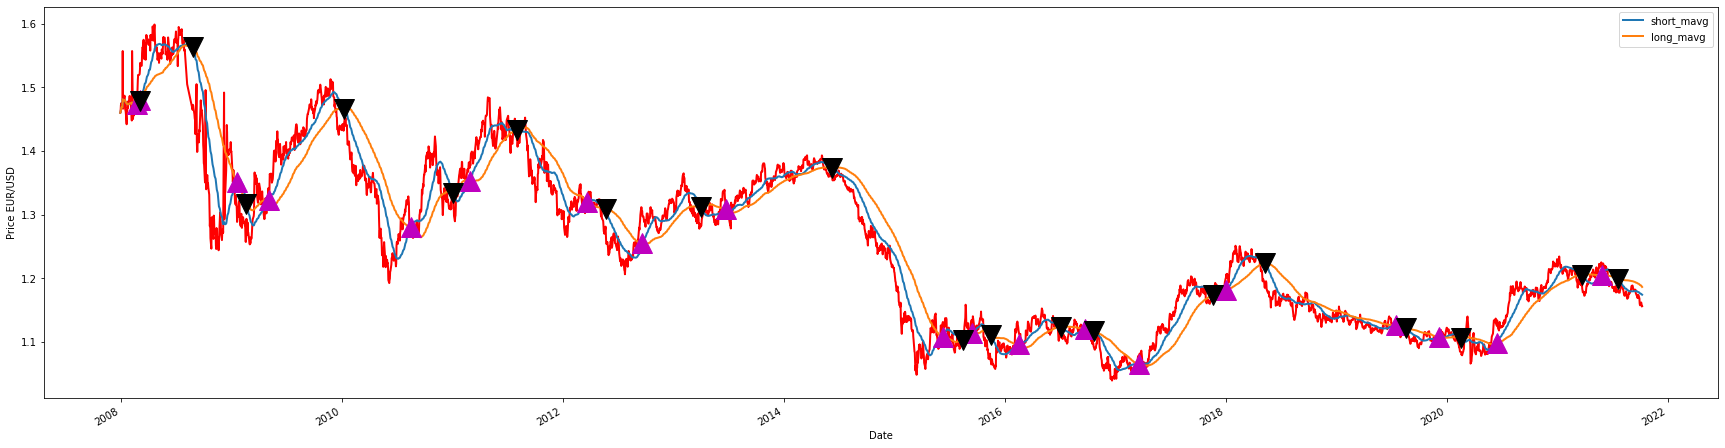

In [38]:
# Initialize the plot figure
fig = plt.figure(figsize=(30,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price EUR/USD')

# Plot the closing price
df['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=20, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=20, color='k')
         
# Show the plot
plt.show()

In [39]:
# Set the initial capital
initial_capital= float(100000.0)

In [40]:
# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

In [59]:
# Buy a 100 shares
positions['EUR/USD'] = 1000*signals['signal']  

In [60]:
positions.tail(10)

,EUR/USD
Date,
2021-09-27,0.0
2021-09-28,0.0
2021-09-29,0.0
2021-09-30,0.0
2021-10-01,0.0
2021-10-04,0.0
2021-10-05,0.0
2021-10-06,0.0
2021-10-07,0.0


In [61]:
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df['Adj Close'], axis=0)

In [62]:

# Store the difference in shares owned 
pos_diff = positions.diff()


In [63]:
# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df['Adj Close'], axis=0)).sum(axis=1)
portfolio.tail(20)

,EUR/USD,holdings
Date,,
2021-09-13,0.0,0.0
2021-09-14,0.0,0.0
2021-09-15,0.0,0.0
2021-09-16,0.0,0.0
2021-09-17,0.0,0.0
2021-09-20,0.0,0.0
2021-09-21,0.0,0.0
2021-09-22,0.0,0.0
2021-09-23,0.0,0.0


In [64]:

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'], axis=0)).sum(axis=1).cumsum()  
portfolio.tail(20)

,EUR/USD,holdings,cash
Date,,,
2021-09-13,0.0,0.0,100093.835831
2021-09-14,0.0,0.0,100093.835831
2021-09-15,0.0,0.0,100093.835831
2021-09-16,0.0,0.0,100093.835831
2021-09-17,0.0,0.0,100093.835831
2021-09-20,0.0,0.0,100093.835831
2021-09-21,0.0,0.0,100093.835831
2021-09-22,0.0,0.0,100093.835831
2021-09-23,0.0,0.0,100093.835831


In [65]:
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [66]:
portfolio.tail(20)

,EUR/USD,holdings,cash,total
Date,,,,
2021-09-13,0.0,0.0,100093.835831,100093.835831
2021-09-14,0.0,0.0,100093.835831,100093.835831
2021-09-15,0.0,0.0,100093.835831,100093.835831
2021-09-16,0.0,0.0,100093.835831,100093.835831
2021-09-17,0.0,0.0,100093.835831,100093.835831
2021-09-20,0.0,0.0,100093.835831,100093.835831
2021-09-21,0.0,0.0,100093.835831,100093.835831
2021-09-22,0.0,0.0,100093.835831,100093.835831
2021-09-23,0.0,0.0,100093.835831,100093.835831


In [67]:
# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

In [68]:
portfolio

,EUR/USD,holdings,cash,total,returns
Date,,,,,
2007-12-31,0.0,0.0,100000.000000,100000.000000,NaN
2008-01-01,0.0,0.0,100000.000000,100000.000000,0.0
2008-01-02,0.0,0.0,100000.000000,100000.000000,0.0
2008-01-03,0.0,0.0,100000.000000,100000.000000,0.0
2008-01-04,0.0,0.0,100000.000000,100000.000000,0.0
...,...,...,...,...,...
2021-10-04,0.0,0.0,100093.835831,100093.835831,0.0
2021-10-05,0.0,0.0,100093.835831,100093.835831,0.0
2021-10-06,0.0,0.0,100093.835831,100093.835831,0.0


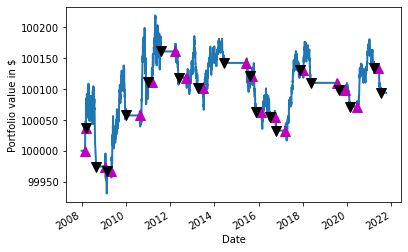

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [70]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.08069408666400978


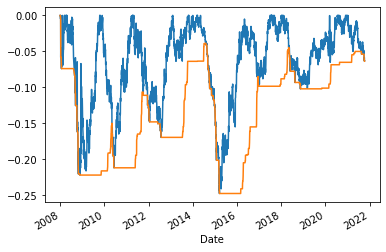

In [71]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = df['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = df['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [72]:
# Get the number of days in `EURUSD`
days = (df.index[-1] - df.index[0]).days
# Print CAGR
print(days)

# Calculate the CAGR 
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

5030
-0.016898630623115585
